In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.datasets import load_iris
d = load_iris()
d.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
f = d['feature_names']
f

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
classes = d['target_names']
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X = d['data']
y = d['target']
X.shape,y.shape

((150, 4), (150,))

In [10]:
#we need to construct a dataframe from x,y so we need to stack them together
y = y[...,np.newaxis]
arr = np.hstack((X,y))


In [16]:
df = pd.DataFrame(data = arr,columns=f+['species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [17]:
df['species'] = df['species'].astype('uint8')# we convert it to uint8 to be able to deal with target names list

In [18]:
# we need to convert species columns into target names
df['species'] = df['species'].apply(lambda x :classes[x] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
# we need to understand the correlation between features
corr = df.iloc[:,:-1].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

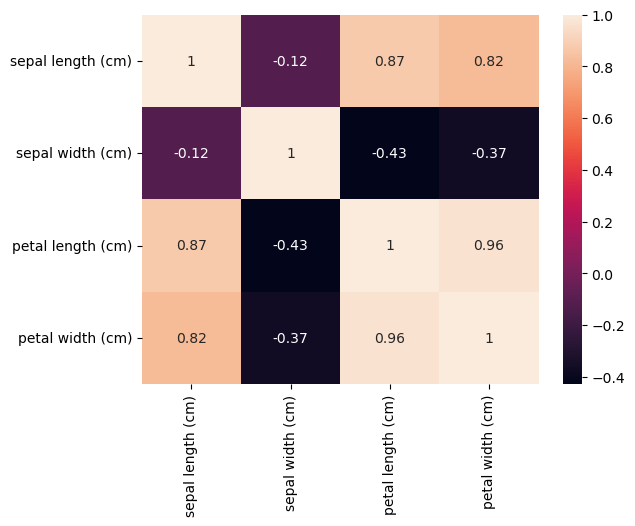

In [22]:
#Visualizing the correlation
sns.heatmap(data = corr,annot=True)

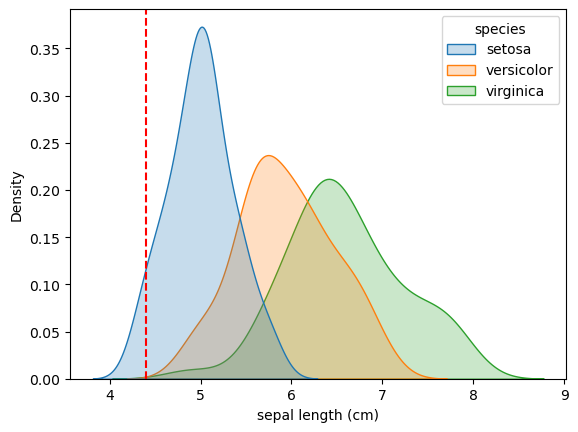

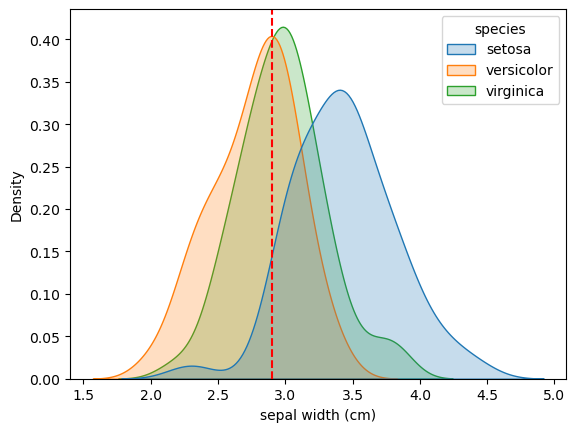

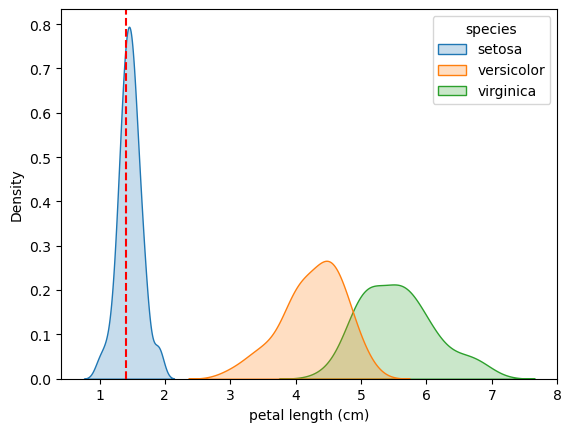

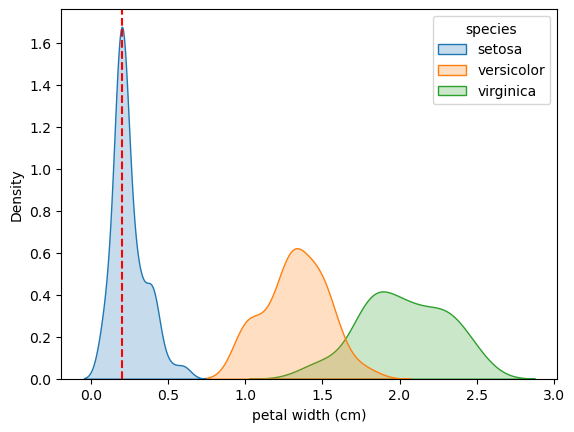

In [25]:
i = np.random.randint(low =0,high = 150)
series = df.iloc[i, :-1]
for col in df.columns[:-1]:
  sns.kdeplot(data =df,x=col,fill =True,hue ='species')
  plt.axvline(x = series[col],linestyle='--',color ='red')
  plt.show()

In [26]:
from sklearn.model_selection import train_test_split
y = np.squeeze(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25, stratify= y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158